C:\Users\HOME\AppData\Local\Temp\ipykernel_11052\3051424967.py:51: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['gdp_per_capita_growth'] = grouped['GDP per Capita (Current USD)'].pct_change()
c:\Users\HOME\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Inflation Prediction Model...
Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 127.7185 - mae: 5.1030 - val_loss: 977.2094 - val_mae: 8.6977
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 160.2874 - mae: 4.9013 - val_loss: 964.2550 - val_mae: 8.1343
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 157.8436 - mae: 4.1850 - val_loss: 944.9717 - val_mae: 7.5286
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 129.6385 - mae: 3.9937 - val_loss: 928.4336 - val_mae: 7.2966
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 193.8607 - mae: 4.4853 - val_loss: 921.4384 - val_mae: 7.2959
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 155.1299 - mae: 4.3188 - val_loss: 919.5076 - val_mae: 7.3128
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 140.5766 - mae: 4.6879 - val_loss: 919.3950 - val_mae: 7.3140
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 148.2052 - mae: 4.5926 - val_loss: 918.8929 - val_mae

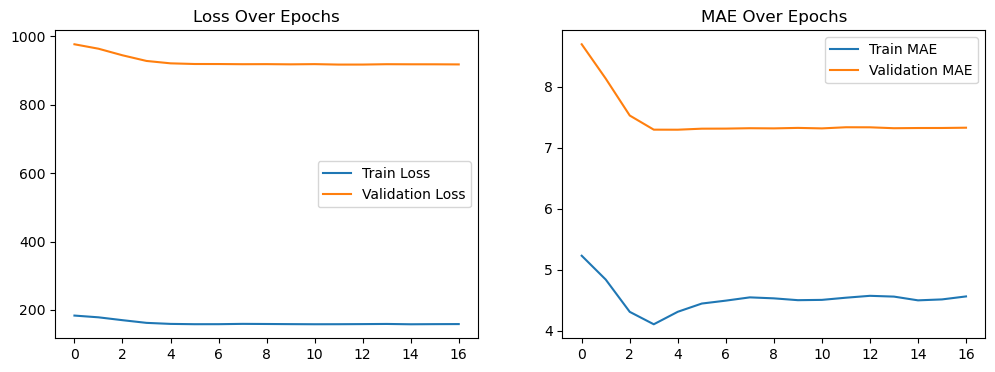

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Test MSE: 917.8038
Test MAE: 7.3361
Test R²: -0.0148


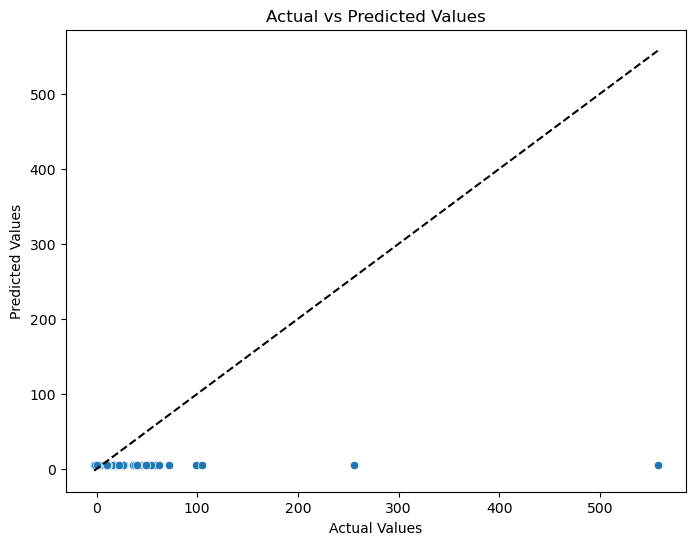


Training GDP Growth Prediction Model...
Epoch 1/100


c:\Users\HOME\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 50.9865 - mae: 4.6418 - val_loss: 37.5849 - val_mae: 4.2433
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37.8818 - mae: 4.1441 - val_loss: 34.6896 - val_mae: 3.7687
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35.7902 - mae: 3.7527 - val_loss: 33.1863 - val_mae: 3.3839
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.7501 - mae: 3.3480 - val_loss: 33.4646 - val_mae: 3.3658
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41.3952 - mae: 3.4704 - val_loss: 33.5894 - val_mae: 3.3722
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.0894 - mae: 3.2657 - val_loss: 33.5723 - val_mae: 3.3712
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.8172 - mae: 3.5114 - val_loss: 33.4954 - val_mae: 3.3672
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30.8026 - mae: 3.2660 - val_loss: 33.5385 - val_mae: 3.3694


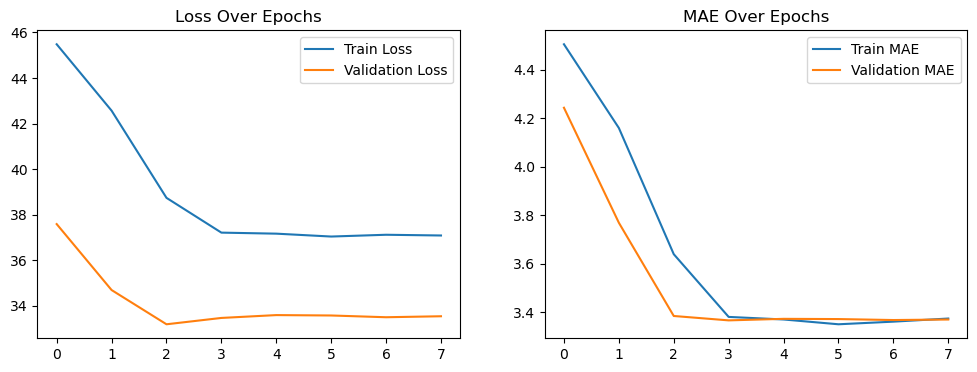

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Test MSE: 33.1863
Test MAE: 3.3839
Test R²: -0.0000


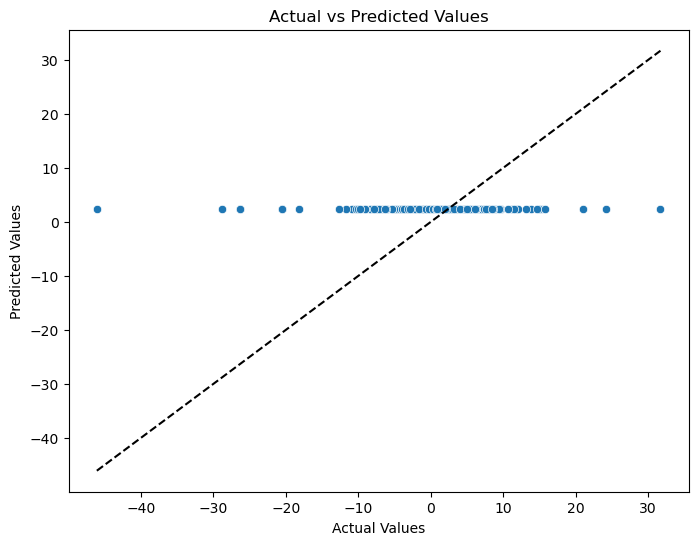

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
def load_and_preprocess(filepath):
    df = pd.read_csv(filepath)
    
    # Convert year to datetime and set as index
    df['year'] = pd.to_datetime(df['year'], format='%Y')
    df.set_index('year', inplace=True)
    
    # Select relevant columns
    features = ['country_name', 'Inflation (CPI %)', 'GDP (Current USD)', 
                'GDP per Capita (Current USD)', 'Unemployment Rate (%)']
    target_inflation = 'Inflation (CPI %)'
    target_gdp = 'GDP Growth (% Annual)'
    
    df = df[features + [target_gdp]]
    
    return df, target_inflation, target_gdp

# Feature engineering
def create_features(df, target_inflation, target_gdp):
    # Group by country for country-specific features
    grouped = df.groupby('country_name')
    
    # Create lag features
    for lag in [1, 2, 3]:  # 1-year, 2-year, and 3-year lags
        df[f'inflation_lag_{lag}'] = grouped[target_inflation].shift(lag)
        df[f'gdp_growth_lag_{lag}'] = grouped[target_gdp].shift(lag)
        df[f'gdp_lag_{lag}'] = grouped['GDP (Current USD)'].shift(lag)
    
    # Rolling statistics
    for window in [3, 5]:  # 3-year and 5-year windows
        df[f'inflation_rolling_mean_{window}'] = grouped[target_inflation].transform(
            lambda x: x.rolling(window).mean())
        df[f'gdp_growth_rolling_mean_{window}'] = grouped[target_gdp].transform(
            lambda x: x.rolling(window).mean())
    
    # GDP per capita growth
    df['gdp_per_capita_growth'] = grouped['GDP per Capita (Current USD)'].pct_change()
    
    # Drop rows with missing values in target or important features
    df = df.dropna(subset=[target_inflation, target_gdp, 'gdp_lag_1', 'inflation_lag_1'])
    
    return df

# Prepare data for modeling
def prepare_data(df, target):
    # Separate features and target
    X = df.drop(columns=[target])
    y = df[target]
    
    # Identify numeric and categorical columns
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_features = ['country_name'] if 'country_name' in X.columns else []
    
    # Create preprocessing pipeline
    transformers = [
        ('num', StandardScaler(), numeric_features)
    ]
    
    if categorical_features:
        transformers.append(('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features))
    
    preprocessor = ColumnTransformer(transformers=transformers)
    
    # Split data into train and test sets (time-based split)
    split_idx = int(0.8 * len(X))  # 80% train, 20% test
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
    
    # Fit preprocessor on training data and transform both sets
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)
    
    return X_train_preprocessed, X_test_preprocessed, y_train, y_test, preprocessor

# Build deep learning model
def build_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)  # Linear activation for regression
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Train and evaluate model
def train_and_evaluate(model, X_train, y_train, X_test, y_test, patience=5):
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('MAE Over Epochs')
    plt.legend()
    plt.show()
    
    # Evaluate on test set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Test MSE: {mse:.4f}")
    print(f"Test MAE: {mae:.4f}")
    print(f"Test R²: {r2:.4f}")
    
    # Plot predictions vs actual
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred.flatten())
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()
    
    return model, history

# Main execution
def main():
    # Load and preprocess data
    filepath = "C:\\Users\\HOME\\Downloads\\world_bank_data_2025.csv"
    df, target_inflation, target_gdp = load_and_preprocess(filepath)
    
    # Feature engineering
    df = create_features(df, target_inflation, target_gdp)
    
    # Model for inflation prediction
    print("\nTraining Inflation Prediction Model...")
    X_train_inf, X_test_inf, y_train_inf, y_test_inf, preprocessor_inf = prepare_data(df, target_inflation)
    model_inf = build_model(X_train_inf.shape[1])
    model_inf, history_inf = train_and_evaluate(
        model_inf, X_train_inf, y_train_inf, X_test_inf, y_test_inf)
    
    # Model for GDP growth prediction
    print("\nTraining GDP Growth Prediction Model...")
    X_train_gdp, X_test_gdp, y_train_gdp, y_test_gdp, preprocessor_gdp = prepare_data(df, target_gdp)
    model_gdp = build_model(X_train_gdp.shape[1])
    model_gdp, history_gdp = train_and_evaluate(
        model_gdp, X_train_gdp, y_train_gdp, X_test_gdp, y_test_gdp)
    
    return model_inf, model_gdp, preprocessor_inf, preprocessor_gdp

if __name__ == "__main__":
    model_inf, model_gdp, preprocessor_inf, preprocessor_gdp = main()